# SimplyP v.0.2 (alpha)

This notebook demonstrates basic usage of the [SimplyP model](https://github.com/LeahJB/SimplyP), without any of the guiding documentation that is found in the accompanying long version of this notebook (so there is less scrolling required to run the model!). See the long version for more detailed guidance and a description of the inputs and outputs.

### 1. User input

In [1]:
# Path to the Excel file containing parameters for setup and all the model parameters
params_fpath = (r'C:\Data\GitHub\SimplyP\Development\v0-2\Parameters_v0-2A_Tarland.xlsx')

# Plotting options: either 'paper' or 'notebook'
fig_display_type = 'notebook'

# Set within-notebook plots to be interactive (zoomable and pannable)?
% matplotlib inline
# % matplotlib notebook

### 2. Read input data

In [2]:
# Import the simplyP module
import simplyP as sp

# Read in model inputs, parameters, and any observations. If necessary calculate derived inputs
p_SU, dynamic_options, p, p_LU, p_SC, p_struc, met_df, obs_dict = sp.read_input_data(params_fpath)

Parameter values successfully read in
Input meteorological data read in
Snow accumulation and melt module run to estimate snowmelt inputs to the soil
Observed discharge data read in
Observed water chemistry data read in


### 3. Run the model

In [3]:
%%time
# Run model
df_TC_dict, df_R_dict, Kf, ode_output_dict = sp.run_simply_p(met_df, p_struc, p_SU, p_LU,
                                                             p_SC, p, dynamic_options)

Starting model run for sub-catchment: 1
No reaches directly upstream of this reach
Finished!

Kf (the soil P sorption coefficient; mm/kg): 0.00011315280464216634

Results saved to csv

Wall time: 5.23 s


### 4. Explore model results

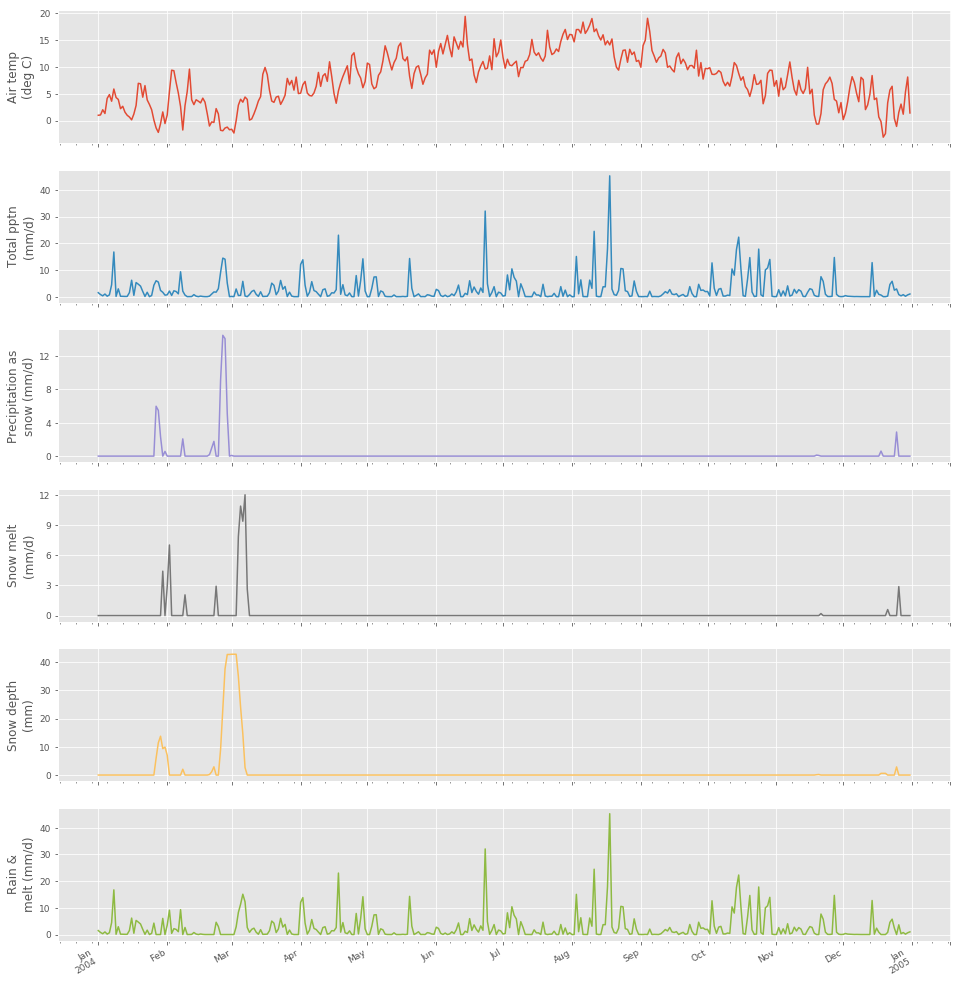

In [4]:
# Plot snowfall/melt
sp.plot_snow(met_df, p_SU, fig_display_type)

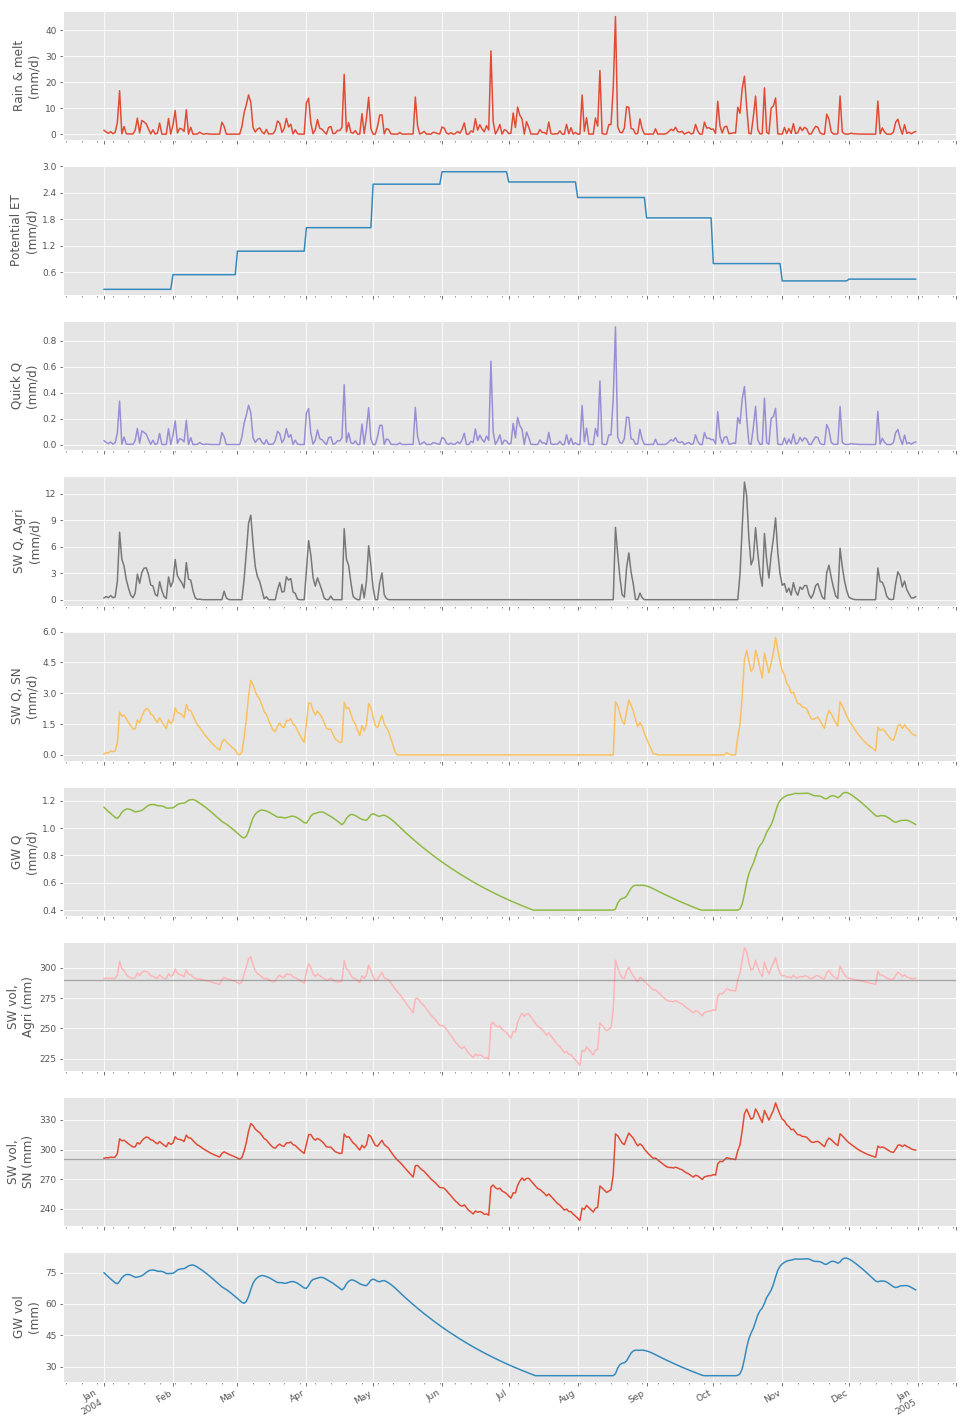

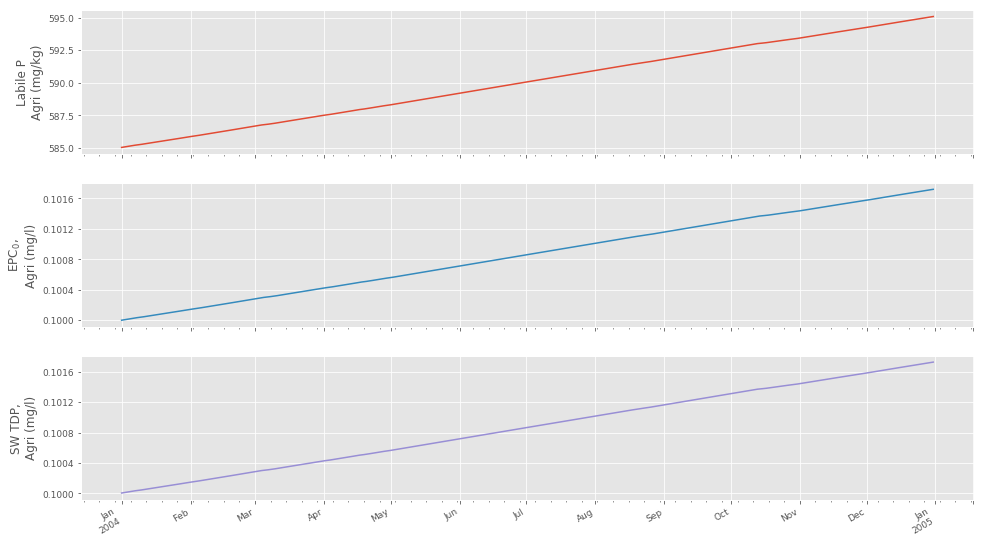

In [21]:
# Plot terrestrial
sp.plot_terrestrial(p_SU, p_SC, p, df_TC_dict, met_df, fig_display_type)

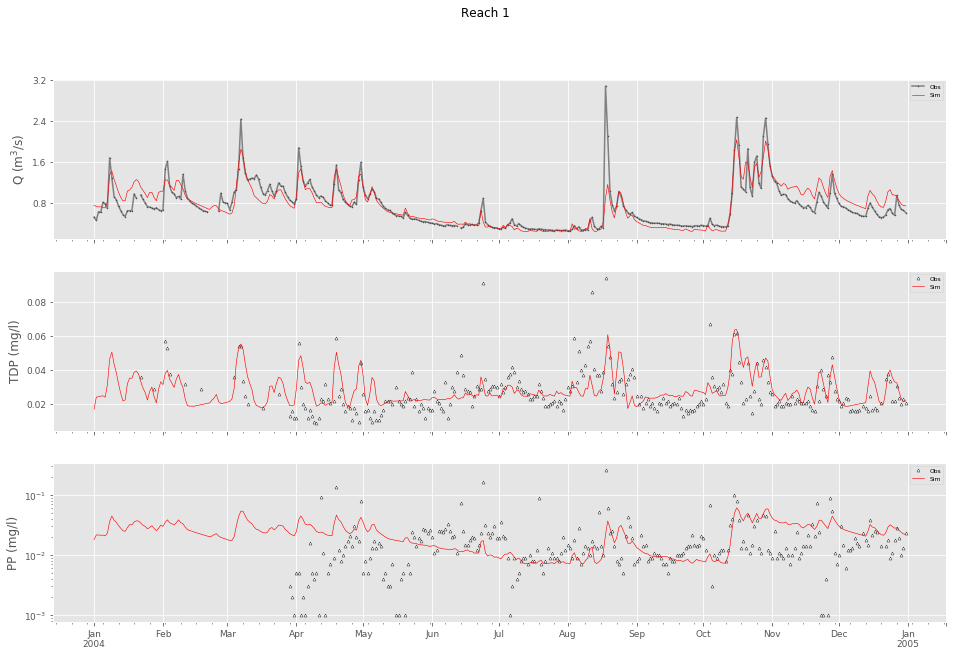

In [23]:
# Plot in-stream
# N.B. if you selected a log scale, you may get a warning if any of the simulated values are close to 0.
sp.plot_in_stream(p_SU, obs_dict, df_R_dict, fig_display_type)

In [24]:
# Calculate goodness of fit
gof_stats = sp.goodness_of_fit_stats(p_SU, df_R_dict, obs_dict)
gof_stats

,N obs,NSE,log NSE,Spearmans r,r$^2$,Bias (%),nRMSD (%),Reach
Q,360,0.740807,0.809239,0.908759,0.747246,2.192381,33.046756,1
SS,285,0.090441,-0.208444,0.499936,0.108315,20.482378,46.583145,1
TDP,286,0.200093,0.132918,0.453287,0.257978,6.594886,62.893256,1
PP,271,-0.076966,-0.499170,0.106863,0.031799,9.501539,59.524986,1
TP,271,0.015756,-0.270411,0.099162,0.092229,8.424893,59.209150,1
SRP,286,-0.354340,-0.489102,0.439628,0.137696,37.465377,94.592601,1


### 5. Optional: Calculate summed inputs to a downstream waterbody (e.g. a lake or an estuary)

In [25]:
# Sum discharges and masses from reaches directly upstream, and calculate
# in-stream concentrations
df_summed = sp.sum_to_waterbody(p_struc, p_SU['n_SC'], df_R_dict, p['f_TDP'])

# Plot results and save to csv if parameter 'save_output_csvs' set to 'y' in
# parameter 'Setup' sheet
if df_summed !=[]: # Only try to plot if at least one reach is included in the sum
    sp.plot_instream_summed(p_SU, df_summed, fig_display_type)

Sub-catchments flowing directly into receiving waterbody: []
No reaches were selected to be included in the sum, check your reach structure parameters
